# Investment Value

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

## Create a DataFrame with the current amount of shares

In [8]:
# Set current amount of shares data
# YOUR CODE HERE!
shares_data = {
    "shares":[200,320]
}
#data = {'MSFT':200, 'AAPL':320}
#MSFT_shares = 200
#AAPL_shares = 320

# Set the tickers
tickers = ['MSFT', 'AAPL']

# Create the shares DataFrame
# YOUR CODE HERE!
data_df = pd.DataFrame(shares_data, index=tickers)
# Display shares data
# YOUR CODE HERE!
data_df

,shares
MSFT,200
AAPL,320


## Load and Verify Environment Variables

In [9]:
# Load .env environment variables
# YOUR CODE HERE!
load_dotenv()

True

In [10]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
api_key = os.getenv('ALPACA_API_KEY')
api_key_secret = os.getenv('ALPACA_SECRET_KEY')

In [12]:
# Verify that Alpaca key and secret were correctly loaded
# YOUR CODE HERE!
type(api_key)
type(api_key_secret)

str

## Create the Alpaca API Object

In [13]:
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    api_key,
    api_key_secret,
    api_version="v2"

)

## Set a variable `today` with current date using ISO format

In [14]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-11-03", tz='America/New_York').isoformat()
today

'2020-11-03T00:00:00-05:00'

## Set a variable `timeframe` with value equal to `1Day`

In [15]:
# Set timeframe to one day ("1Day") for the Alpaca API
# YOUR CODE HERE!
timeframe = '1Day'

## Create a DataFrame with current price data for `MSFT` & `APPL` using `alpaca.get_bars()`

In [21]:
# Get current price data for MSFT and AAPL
# YOUR CODE HERE!


df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start=today,
    end=today
).df

df_portfolio
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!

AAPL = df_portfolio[df_portfolio['symbol']=='AAPL']
MSFT = df_portfolio[df_portfolio['symbol']=='MSFT']

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_portfolio = pd.concat([AAPL,MSFT], axis=1, keys=["AAPL", "MSFT"])

# Display sample data
# YOUR CODE HERE!
df_portfolio

AAPL                                     \
                             open    high     low   close     volume   
timestamp                                                              
2020-11-03 05:00:00+00:00  109.65  111.49  108.73  110.44  107629365   

                                                            MSFT          \
                          trade_count        vwap symbol    open    high   
timestamp                                                                  
2020-11-03 05:00:00+00:00      640257  110.449376   AAPL  203.89  208.12   

                                                                             \
                              low   close    volume trade_count        vwap   
timestamp                                                                     
2020-11-03 05:00:00+00:00  203.12  206.43  27514452      277396  206.487108   

                                  
                          symbol  
timestamp                         
2020-11-03 05:00:00+00:00   MSFT

## Calculate the current value in dollars of the stock portfolio

In [24]:
# Fetch the current closing prices from the DataFrame
# YOUR CODE HERE!

aapl_price = float(df_portfolio['AAPL']['close'])
msft_price = float(df_portfolio['MSFT']['close'])

In [28]:
# Compute the current value in dollars of the stock portfolio
# YOUR CODE HERE!

aapl_value = aapl_price * data_df.loc['AAPL']['shares']
msft_value = aapl_price * data_df.loc['MSFT']['shares']
total = aapl_value+msft_value


# Print the current value of the stocks portfolio
# YOUR CODE HERE!
total

57428.8

## Plot stock portfolio composition

### Create a DataFrame with the current value of shares

In [31]:
# Set the data for the shares value DataFrame
# YOUR CODE HERE!
value_data = {
    "MSFT":[msft_value],
    "AAPL": [aapl_value]
}

# Create a DataFrame with the current value of shares
# YOUR CODE HERE!
df_value = pd.DataFrame(value_data)
# Display DataFrame data
# YOUR CODE HERE!
df_value

,MSFT,AAPL
0,22088.0,35340.8


<AxesSubplot:ylabel='shares'>

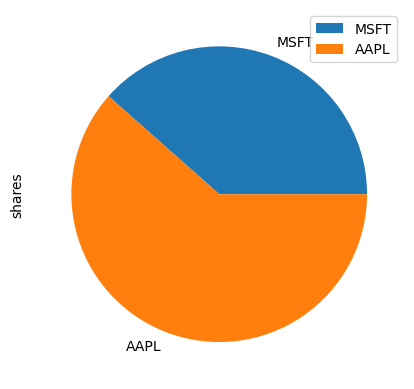

In [35]:
# Create a pie chart to show the proportion of stocks in the portfolio
# YOUR CODE HERE!

data_df.plot.pie(y='shares')

<AxesSubplot:>

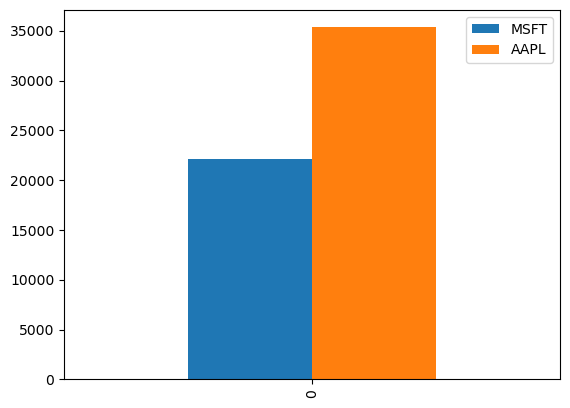

In [36]:
# Create a bar plot to show the value of shares
# YOUR CODE HERE!

df_value.plot.bar()
